# CatBoost. Задача бинарной классификации

### Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("../datasets/mushroom_cleaned.csv")

x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=["class"]), data["class"], test_size=0.2, random_state=42)
data

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


### Создание конвейера

In [2]:
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.75,
    depth=4,
    loss_function="Logloss",
    verbose=False,
)

pipe = Pipeline((("scaler", StandardScaler()), ("catboost", model)))

### Обучение модели

In [4]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x0000028D24AABC10>)])

### Проверка точности

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
score = pipe.score(x_test, y_test)
print(f"Точность: {score * 100:.2f}%")

Точность: 98.82%


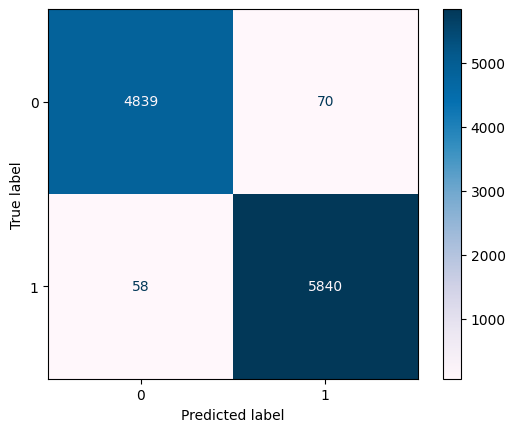

In [7]:
y_pred = pipe.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="PuBu")

### Кросс-валидация модели

In [8]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(model, x_train, y_train, cv=7)
print("Перекрестная проверка:", [round(val, 3) for val in cv_score])

Перекрестная проверка: [0.986, 0.988, 0.986, 0.989, 0.986, 0.985, 0.985]
